<a href="https://colab.research.google.com/github/seungjun02/reinforcement-Learning/blob/main/chapter4/4_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

도박사 문제 가치 반복 알고리즘

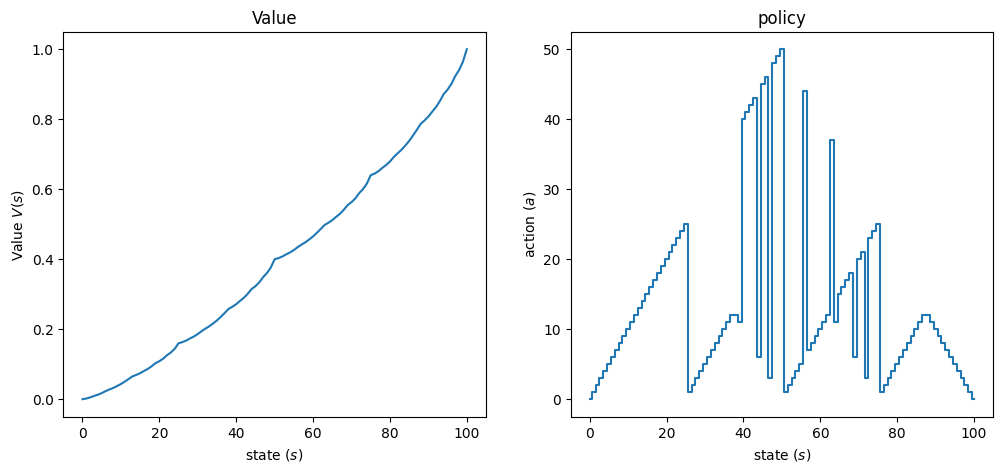

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 도박사 문제 환경 설정
goal = 100  # 목표 금액
p = 0.4  # 승리 확률
theta = 1e-9  # 수렴 조건
V = np.zeros(goal + 1)  # 가치 함수 초기화
V[goal] = 1  # 목표 상태에서의 보상

# 가치 반복 알고리즘
while True:
    delta = 0
    for s in range(1, goal):  # 상태 s에 대해 반복
        actions = np.arange(1, min(s, goal - s) + 1)  # 가능한 베팅 금액
        new_values = [p * V[s + a] + (1 - p) * V[s - a] for a in actions]
        max_value = max(new_values)
        delta = max(delta, abs(V[s] - max_value))
        V[s] = max_value
    if delta < theta:
        break

# 최적 정책 추출
policy = np.zeros(goal + 1)
for s in range(1, goal):
    actions = np.arange(1, min(s, goal - s) + 1)
    values = [p * V[s + a] + (1 - p) * V[s - a] for a in actions]
    policy[s] = actions[np.argmax(values)]  # 최적 행동 선택

# 결과 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(V)
plt.xlabel("state ($s$)")
plt.ylabel("Value $V(s)$")
plt.title("Value")

plt.subplot(1, 2, 2)
plt.step(range(goal + 1), policy, where="mid")
plt.xlabel("state ($s$)")
plt.ylabel("action ($a$)")
plt.title("policy")

plt.show()